# Mat->Py->Mat Multi PSD Example

This notebook is an example, with multiple power spectra, of integrating Python FOOOF into a Matlab workflow. 

It is part of a trio of files that must be run in order:
- `MultiPSD_A_*
- `MultiPSD_B_*
- `MultiPSD_C_*

This code must be run after `MultiPSD_A_matlab_preprocessing.m` has been run. 

In [26]:
print(freqs)

[  0.          0.9765625   1.953125    2.9296875   3.90625     4.8828125
   5.859375    6.8359375   7.8125      8.7890625   9.765625   10.7421875
  11.71875    12.6953125  13.671875   14.6484375  15.625      16.6015625
  17.578125   18.5546875  19.53125    20.5078125  21.484375   22.4609375
  23.4375     24.4140625  25.390625   26.3671875  27.34375    28.3203125
  29.296875   30.2734375  31.25       32.2265625  33.203125   34.1796875
  35.15625    36.1328125  37.109375   38.0859375  39.0625     40.0390625
  41.015625   41.9921875  42.96875    43.9453125  44.921875   45.8984375
  46.875      47.8515625  48.828125   49.8046875  50.78125    51.7578125
  52.734375   53.7109375  54.6875     55.6640625  56.640625   57.6171875
  58.59375    59.5703125  60.546875   61.5234375  62.5        63.4765625
  64.453125   65.4296875  66.40625    67.3828125  68.359375   69.3359375
  70.3125     71.2890625  72.265625   73.2421875  74.21875    75.1953125
  76.171875   77.1484375  78.125      79.1015625  8

In [1]:
import fooof as ff
IAP= ff.analysis.get_band_peak_fm(ff,[7,14],select_highest=True)


AttributeError: module 'fooof' has no attribute 'peak_params_'

In [2]:
%matplotlib inline

import numpy as np
from scipy.io import loadmat, savemat

from fooof import FOOOFGroup

In [3]:
# Load the mat file 
data = loadmat('power_spectra.mat')

# Unpack data from dictionary, and squeeze numpy arrays
freqs = np.squeeze(data['freqs']).astype('float')
psds = np.squeeze(data['psds']).astype('float')
# ^Note: this also explicitly enforces type as float (type casts to float64, instead of float32)
#  This is not strictly necessary for fitting, but is for saving out as json from FOOOF, if you want to do that

# Transpose power spectra, to have the expected orientation for FOOOF
psds = psds.T  

In [22]:
print(fm)

NameError: name 'fm' is not defined

In [4]:
# Initialize FOOOFGroup object
fg = FOOOFGroup()

Running FOOOFGroup across 2 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.98 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                       FOOOF - GROUP RESULTS                                      
                                                                                                  
                             Number of power spectra in the Group: 2                              
                                                                                                  
                        The model was run on the frequency range 1 - 30 Hz                        
           

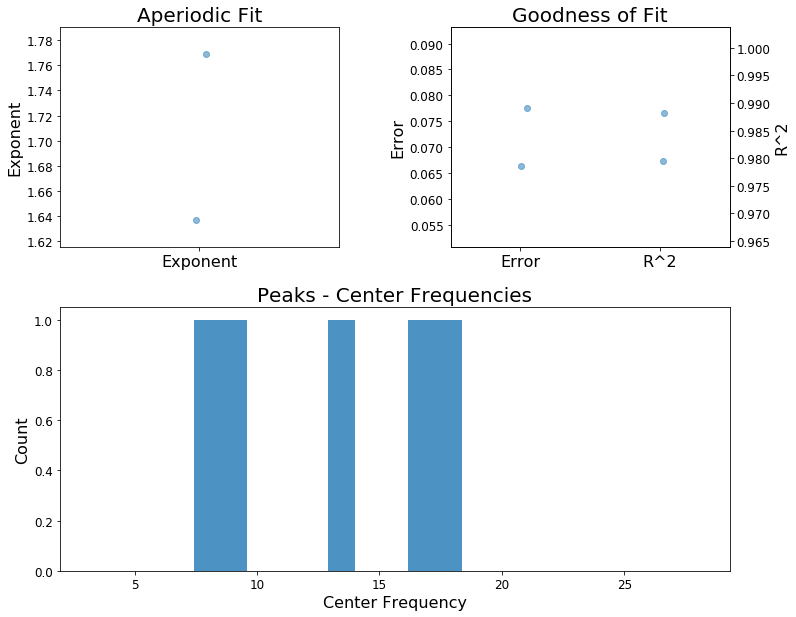

In [5]:
# Fit the FOOOF model on all PSDs, and report
fg.report(freqs, psds, [1, 30])

In [7]:
# Save out a specific FOOOF measure of interest - for example, slopes
exps = fg.get_params('aperiodic_params', 'exponent')
savemat('exps.mat', {'exps' : exps})

In [8]:
# Save out fooof results to json file
#  There is a utility file to load this json file directly into Matlab
fg.save('fooof_results', save_results=True)

In [20]:
# Alternatively: save out full FOOOFresults for each PSD fit separately to mat files
#  This might be useful if you are using Matlab < r2016B, and don't have json support
for ind, f_res in enumerate(fg):
    savemat('f_results_' + str(ind) + '.mat', f_res._asdict())